In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import json
from glob import glob

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
import re, string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/segurithvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/segurithvik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/segurithvik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/segurithvik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
#reading json file
checkin = pd.read_json('/Users/segurithvik/Downloads/yelp_academic_dataset_checkin.json', lines=True)
tip = pd.read_json('/Users/segurithvik/Downloads/yelp_academic_dataset_tip.json', lines=True)
business = pd.read_json('/Users/segurithvik/Downloads/yelp_academic_dataset_business.json', lines=True)



In [3]:
# The review data is too large to read in normally, so we will read it in by chunks of 1000 

# Empty list to store each chunk
chunks = []

# Specify dtypes 
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32} 

# Store the json chunks
reader = pd.read_json('/Users/segurithvik/Downloads/yelp_academic_dataset_review.json',
                      lines=True,
                      chunksize=1000,
                      dtype=r_dtypes,
                      orient='records')



In [4]:
# For loop to append each chunk into the chunks list
for chunk in reader:
        reduced_chunk = chunk.query("`date` >= '2017-12-01'")
        chunks.append(reduced_chunk)

# Concatenate each chunk into a single dataframe        
reviews = pd.concat(chunks, ignore_index=True)

In [5]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38
3,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5.0,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21
4,A4n4YaE-owOVgTQcrVqHUw,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4.0,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07 20:50:12


In [7]:
print('Size of Business DataFrame: ',business.shape)
print('Size of Reviews DataFrame: ',reviews.shape)

Size of Business DataFrame:  (150346, 14)
Size of Reviews DataFrame:  (3080579, 9)


In [8]:
print('Number of Unique Businesses in Review Data: ',reviews['business_id'].nunique())
print('Number of Unique Businesses in Business Data: ',business['business_id'].nunique())

Number of Unique Businesses in Review Data:  130853
Number of Unique Businesses in Business Data:  150346


In [9]:
business_cat=', '.join(business['categories'].dropna())
cat=pd.DataFrame(business_cat.split(', '),columns=['category']) #grouping by category column
cat_ser = cat.category.value_counts() #counting the value of each category in the column
cat_df = pd.DataFrame(cat_ser)
cat_df.reset_index(inplace=True)

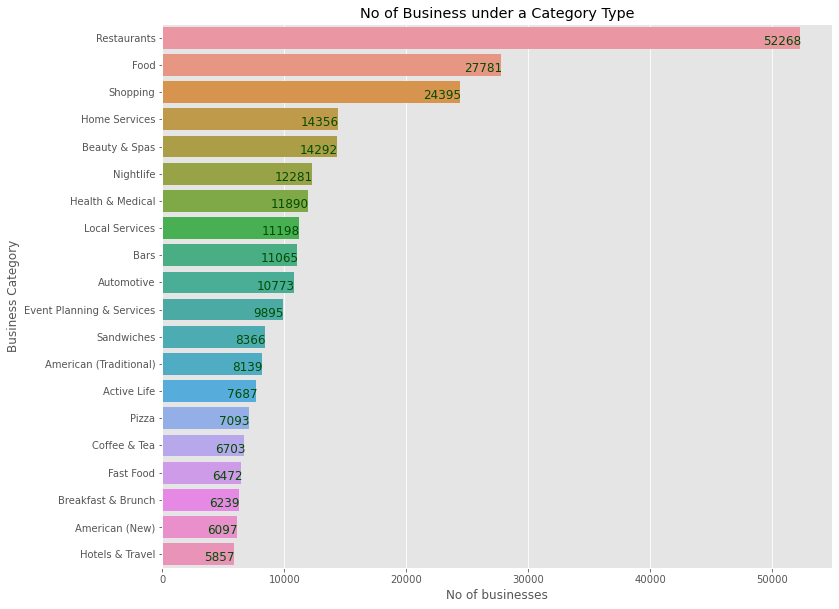

In [11]:
plt.figure(figsize=(12,10))
axis = sns.barplot( y= 'index',x = 'category' , data = cat_df.iloc[0:20]) # using barplot andf declaring the indexes
axis.set_ylabel('Business Category') #setting up y label
axis.set_xlabel('No of businesses') #setting up x label
axis.set_title('No of Business under a Category Type')



for p in axis.patches:
    axis.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width()),
                 p.get_y()),
                 xytext=(1, -18),
                fontsize=12,
                color='#004d00',
                textcoords='offset points',
                horizontalalignment='right')   
plt.show()

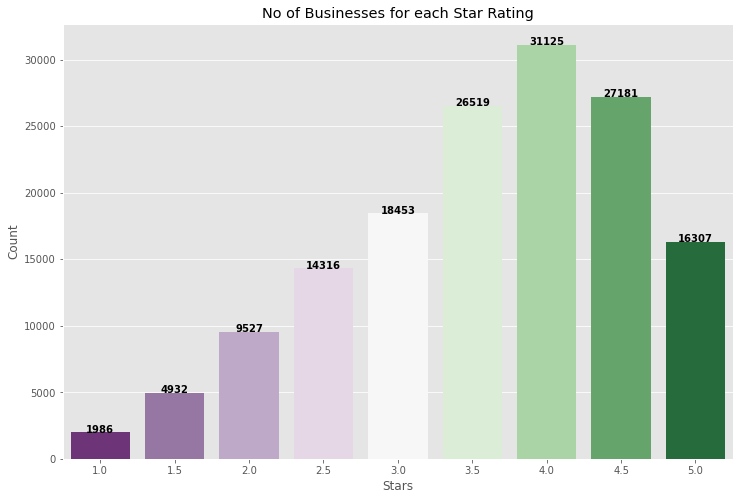

In [12]:
plt.figure(figsize=(12,8))
axis = sns.countplot( x='stars' , data = business, palette='PRGn')
axis.set_ylabel('Count') #setting up y label
axis.set_xlabel('Stars') #setting up x label
axis.set_title('No of Businesses for each Star Rating')

for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axis.text(x+width-.4, 
                y+height,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center') 
                
plt.show()

In [13]:
business['is_open'].value_counts()

1    119698
0     30648
Name: is_open, dtype: int64

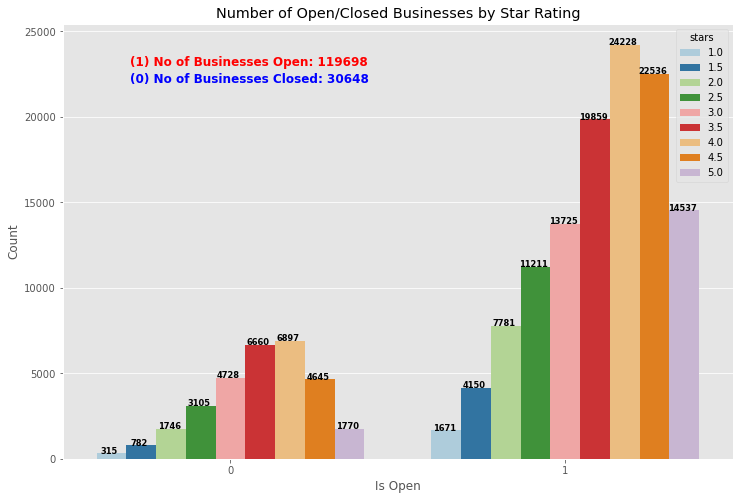

In [14]:
plt.figure(figsize=(12,8))
axis = sns.countplot(hue='stars', x='is_open'  , data = business, palette='Paired')
axis.set_ylabel('Count')
axis.set_xlabel('Is Open')
axis.set_title('Number of Open/Closed Businesses by Star Rating')


num_open , num_closed = business['is_open'].value_counts()

axis.text(-0.3, 23000,
        '(1) No of Businesses Open: {:.0f}'.format(num_open),
        weight='bold',
        color='red',
        size='large')

axis.text(-0.3, 22000,
        '(0) No of Businesses Closed: {:.0f}'.format(num_closed),
        weight='bold',
        color='blue',
        size='large')



for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axis.text(x+width-.05, 
                y+height,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
                size='small') 
                
plt.show()

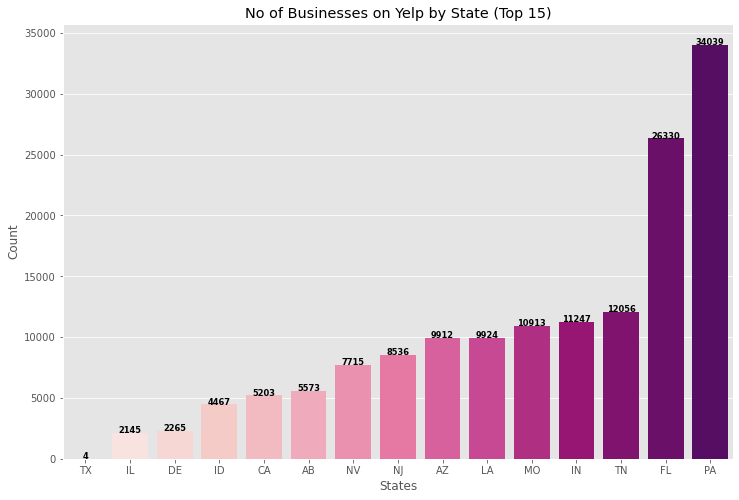

In [15]:
top15 = business['state'].value_counts(ascending=True).tail(15).to_frame()

plt.figure(figsize=(12,8))
ax = sns.barplot(x=top15.index,y='state', data=top15, palette='RdPu')
ax.set_ylabel('Count')
ax.set_xlabel('States')
ax.set_title('No of Businesses on Yelp by State (Top 15)')

for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width-.4, 
                y+height+2,
                '{:.0f}'.format(height),
                weight='bold',
                horizontalalignment='center',
               size='small') 
                
plt.show()

In [16]:
# Recode 1,2, and 3 stars as 0 (negative review)
# Recode 4 and 5 stars as 1 (positive review)

reviews['sentiment']=reviews['stars'].replace({1:0,2:0,3:0,4:1,5:1})
reviews['sentiment'] = reviews['sentiment'].astype(int)

In [17]:
# Since this dataset is so large, we will work with a random sample of 100,000 reviews

reviews_subset = reviews.sample(100000).reset_index(drop=True)

In [18]:
df = reviews_subset[['text','sentiment']]
df.head()

,text,sentiment
0,Kevin and Stefanee are the reason I will be ba...,1
1,"I got to hand it to them, they made the best o...",1
2,Zero stars if I could. This guy is a rip off. ...,0
3,The lady that greeted me smelled like an ashtr...,0
4,"Great ambiance, awesome food and reasonably pr...",1
